# Importing Neccessary Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Reading the Dataset

In [5]:
df = pd.read_csv('./train.csv')

In [6]:
# Taking 30 percentage of the dataset for this project as using whole dataset crashes the memory threshold of kaggle kernels
df = df.head(2300)

In [7]:
df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Converting the images into Numpy array to train the CNN

In [8]:
width = 350
height = 350
X = []
for i in tqdm(range(df.shape[0])):
  path = './Images/'+df['Id'][i]+'.jpg'
  img = image.load_img(path,target_size=(width,height,3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 2300/2300 [00:08<00:00, 258.67it/s]


In [9]:
X.shape

(2300, 350, 350, 3)

In [10]:
y = df.drop(['Id','Genre'],axis=1)
y = y.to_numpy()
y.shape

(2300, 25)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

# Preparing the model

In [12]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))

C:\Users\crist\PycharmProjects\AI_Cat_Cris\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 348, 348, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 348, 348, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 174, 174, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 174, 174, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 172, 172, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 172, 172, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 86, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 86, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 84, 84, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 84, 84, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 112896)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,450,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,478,585 (55.23 MB)

 Trainable params: 14,478,105 (55.23 MB)

 Non-trainable params: 480 (1.88 KB)

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 55s 735ms/step - accuracy: 0.0615 - loss: 0.8359 - val_accuracy: 0.1913 - val_loss: 6.6471
Epoch 2/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 51s 780ms/step - accuracy: 0.1466 - loss: 0.6372 - val_accuracy: 0.2304 - val_loss: 5.5430
Epoch 3/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 53s 819ms/step - accuracy: 0.2078 - loss: 0.4137 - val_accuracy: 0.1913 - val_loss: 2.9992
Epoch 4/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.2972 - loss: 0.2897 - val_accuracy: 0.1826 - val_loss: 6.8010
Epoch 5/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.2876 - loss: 0.2761 - val_accuracy: 0.1783 - val_loss: 0.6385


In [16]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

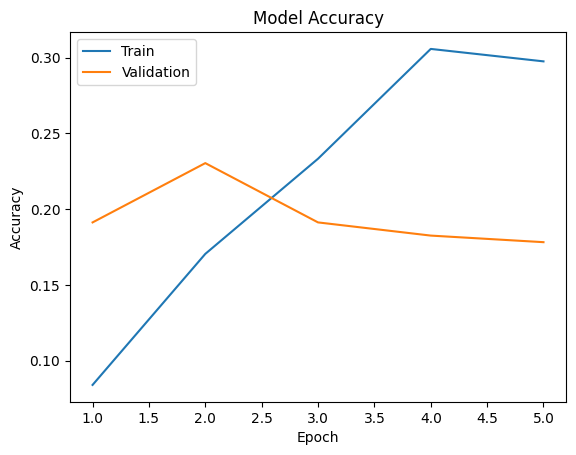

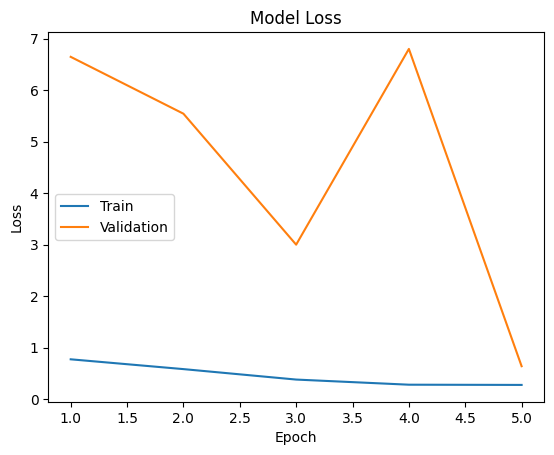

In [17]:
plotLearningCurve(history,5)

# Applying the trained model to Predict the Genre of the input image

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[7.1553458e-03 1.7973080e-03 1.6010343e-03 4.7713087e-04 3.7734544e-01
  2.4994932e-02 1.1376753e-04 9.1046315e-01 7.3214370e-04 1.4302876e-03
  8.8529472e-05 4.2790612e-03 1.2319820e-03 6.6924846e-04 7.8156972e-03
  3.2292935e-04 3.0206480e-05 3.7776183e-05 5.6479871e-01 9.9632004e-04
  4.4598100e-03 1.4482259e-03 3.8936685e-03 1.3384009e-03 6.9672693e-05]]
Drama
Romance
Comedy


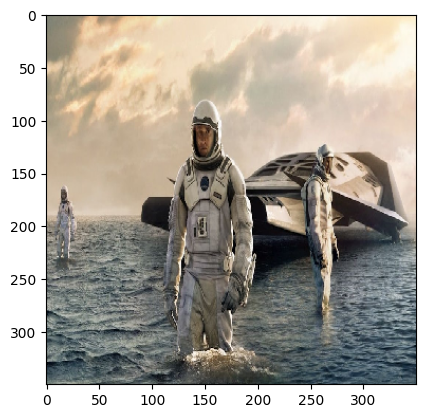

In [19]:
img = image.load_img('./interstellar.jpeg',target_size=(width,height,3))
img2 = image.load_img('./interstellar.jpeg',target_size=(width,height,3))
img3 = image.load_img('./interstellar.jpeg',target_size=(width,height,3))

img_array = [img, img2, img3]
#TODO: loop through array & get classes, add them and get the 3 most potential of it - done to increase accuracy

plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,width,height,3)
classes = df.columns[2:]
print(classes)
y_pred = model.predict(img)
print(y_pred)
top3=np.argsort(y_pred[0])[:-4:-1]
for i in range(3):
  print(classes[top3[i]])

# As you can see from the above output Model predicted the "Drama", "Thriller" and "Action" genre of the film from the poster of the image.